In [2]:
# Histogram Equalization is a technique in image processing used to improve the contrast of an image.
# It works by adjusting the intensity distribution of the image so that the pixel values are spread out more evenly,
# thus enhancing the visual contrast. The idea is to flatten and stretch the image’s histogram so that all intensity 
# levels are utilized more effectively, especially in regions where pixel intensities are concentrated.

house_tree_image_pixel_data max 255
house_tree_image_pixel_data min 0


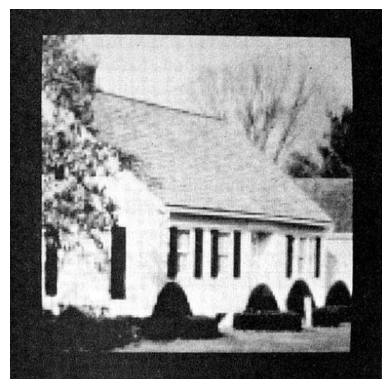

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert
image = Image.open("house_and_tree.jpg").convert("L")

# Convert the image to a NumPy array
house_tree_image_pixel_data = np.array(image)

print("house_tree_image_pixel_data max", house_tree_image_pixel_data.max())
print("house_tree_image_pixel_data min", house_tree_image_pixel_data.min())

# Display the image using Matplotlib
plt.imshow(house_tree_image_pixel_data, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

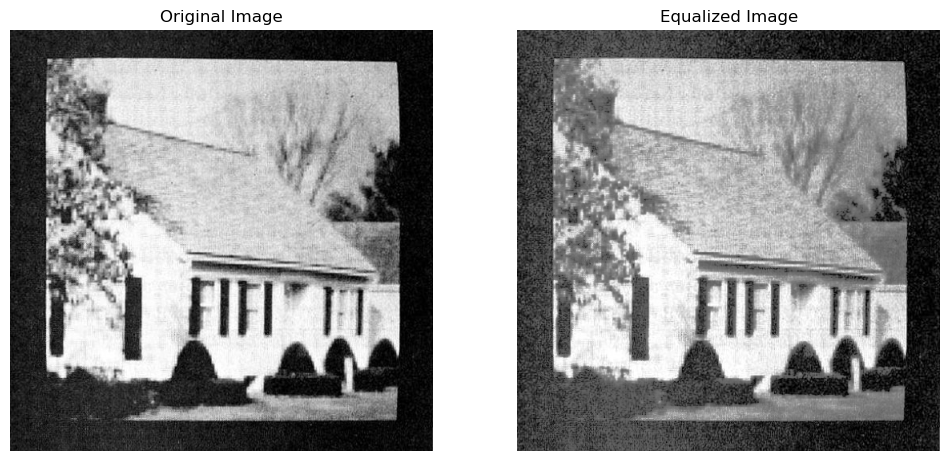

In [5]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(house_tree_image_pixel_data)

# Plot the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(house_tree_image_pixel_data, cmap='gray')
plt.title("Original Image")
plt.axis("off") 

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off") 

plt.show()


In [6]:
"""
Count pixel intensities (0-255) in a grayscale image.
Histogram equalization depends on understanding the original intensity distribution.
"""
def compute_histogram(image):
    hist = [0] * 256  
    width, height = image.size
    
    for x in range(width):
        for y in range(height):
            pixel = image.getpixel((x, y))
            hist[pixel] += 1  

    return hist

""" 
Compute the Cumulative Distribution Function (CDF). 
Histogram equalization uses CDF to map original intensities to new values.
It is needed to redistribute intensities such that the output CDF is approximately linear.
"""
def compute_cdf(hist):
    cdf = [0] * 256
    cdf[0] = hist[0]  

    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]  

    return cdf

"""
Normalize the CDF to scale pixel values to 0-255. 
Ensures output intensities are valid and span the entire dynamic range.
"""
def normalize_cdf(cdf, total_pixels):

    min_cdf = min(cdf)
    equalized_values = [0] * 256  

    for i in range(256):
        equalized_values[i] = round(((cdf[i] - min_cdf) / (total_pixels - min_cdf)) * 255)

    return equalized_values

""" 
Apply histogram equalization using the computed transformation. 
Each pixel is replaced by its corresponding equalized intensity from the lookup table (equalized_values).
"""
def apply_equalization(image, equalized_values):
    width, height = image.size
    new_image = Image.new("L", (width, height))  

    for x in range(width):
        for y in range(height):
            old_pixel = image.getpixel((x, y))
            new_pixel = equalized_values[old_pixel]
            new_image.putpixel((x, y), new_pixel)

    return new_image


####### Workflow: ######
# Compute histogram.
# Compute CDF.
# Normalize CDF to create a lookup table.
# Apply the lookup table to the image.
def histogram_equalization(image):
    """ Perform histogram equalization on a grayscale image. """
    hist = compute_histogram(image)
    cdf = compute_cdf(hist)
    equalized_values = normalize_cdf(cdf, image.size[0] * image.size[1])
    equalized_image = apply_equalization(image, equalized_values)
    return equalized_image, hist, cdf

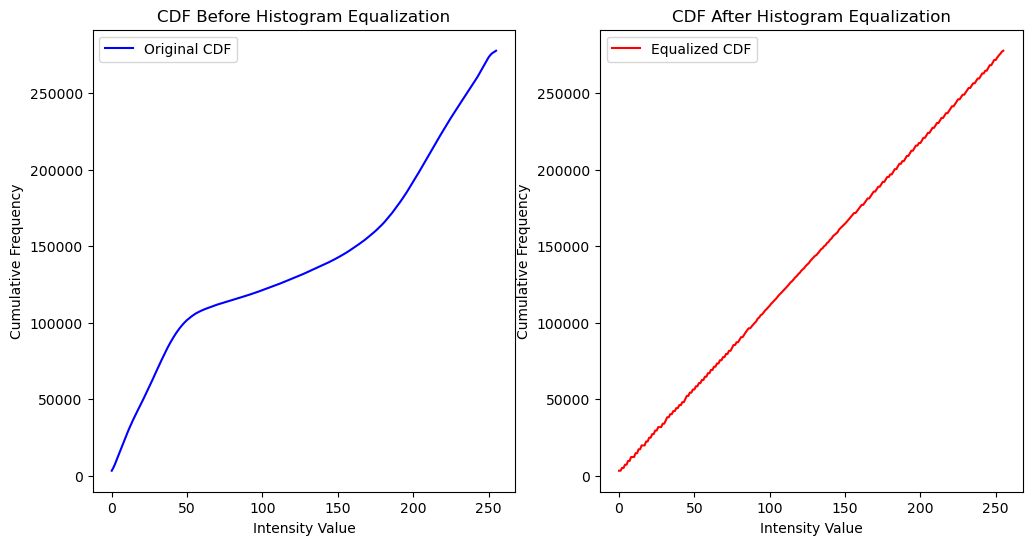

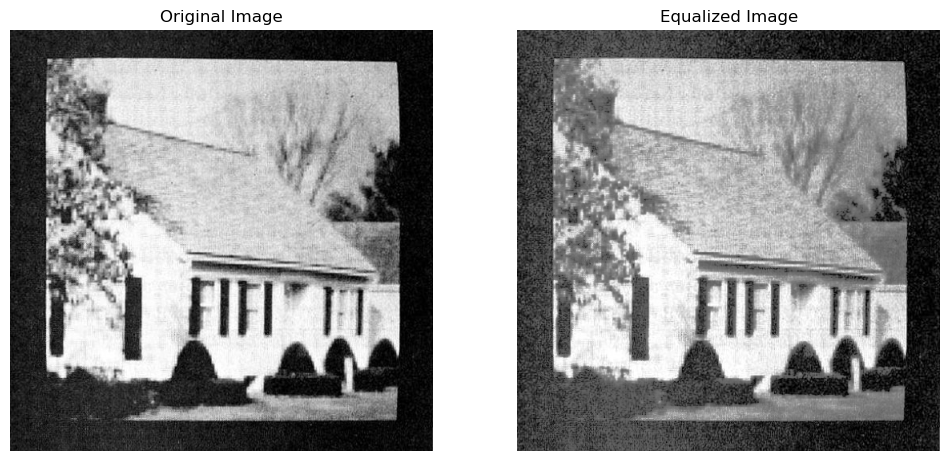

In [7]:
# Using the above house

# Load and process image
image = Image.open("house_and_tree.jpg").convert("L")
equalized_image, original_hist, original_cdf = histogram_equalization(image)

# Compute histogram and CDF for equalized image
equalized_hist = compute_histogram(equalized_image)
equalized_cdf = compute_cdf(equalized_hist)

# Plot CDF Before and After Equalization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(256), original_cdf, color='blue', label="Original CDF")
plt.xlabel("Intensity Value")
plt.ylabel("Cumulative Frequency")
plt.title("CDF Before Histogram Equalization")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(256), equalized_cdf, color='red', label="Equalized CDF")
plt.xlabel("Intensity Value")
plt.ylabel("Cumulative Frequency")
plt.title("CDF After Histogram Equalization")
plt.legend()

plt.show()

# Plot original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

plt.show()

# Cumulative Distribution Function

house_tree_image_pixel_data max 254
house_tree_image_pixel_data min 80


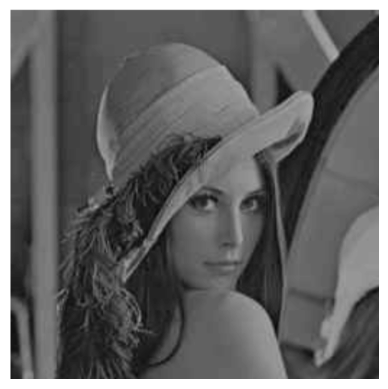

In [8]:
leena_image = Image.open("leena_low_contrast.png").convert("L")

# Convert the image to a NumPy array
leena_image_data = np.array(leena_image)

print("house_tree_image_pixel_data max", leena_image_data.max())
print("house_tree_image_pixel_data min", leena_image_data.min())

# Display the image using Matplotlib
plt.imshow(leena_image_data, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

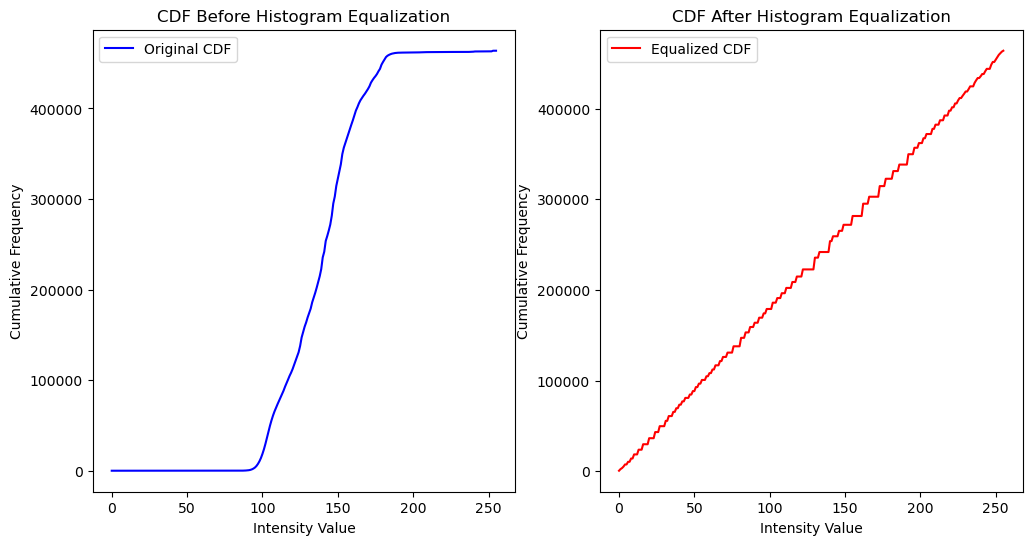

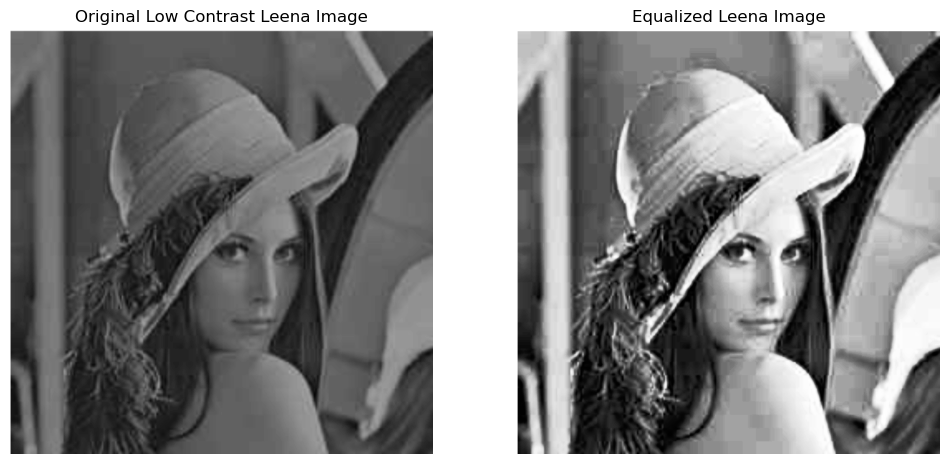

In [12]:
equalized_image, original_hist, original_cdf = histogram_equalization(leena_image)

# Compute histogram and CDF for equalized image
equalized_hist = compute_histogram(equalized_image)
equalized_cdf = compute_cdf(equalized_hist)

# Plot CDF Before and After Equalization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(256), original_cdf, color='blue', label="Original CDF")
plt.xlabel("Intensity Value")
plt.ylabel("Cumulative Frequency")
plt.title("CDF Before Histogram Equalization")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(256), equalized_cdf, color='red', label="Equalized CDF")
plt.xlabel("Intensity Value")
plt.ylabel("Cumulative Frequency")
plt.title("CDF After Histogram Equalization")
plt.legend()

plt.show()

# Plot original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(leena_image, cmap='gray')
plt.title("Original Low Contrast Leena Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Leena Image")
plt.axis("off")

plt.show()